# Analysis based on population

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Reading 

In [2]:
df = pd.read_csv('covid_worldwide.csv')
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [3]:
df.iloc[90,:]

Serial Number               91
Country                  China
Total Cases            503,302
Total Deaths             5,272
Total Recovered        379,053
Active Cases           118,977
Total Test         160,000,000
Population                 NaN
Name: 90, dtype: object

In [4]:
# addind china's missing value
df.at[90, 'Population'] = '1,410,000,000'

In [5]:
#removig countries with 0 population

df = df.dropna(subset=['Population'])
print(df)

     Serial Number         Country  Total Cases Total Deaths Total Recovered  \
0                1             USA  104,196,861    1,132,935     101,322,779   
1                2           India   44,682,784      530,740      44,150,289   
2                3          France   39,524,311      164,233      39,264,546   
3                4         Germany   37,779,833      165,711      37,398,100   
4                5          Brazil   36,824,580      697,074      35,919,372   
..             ...             ...          ...          ...             ...   
224            225      Montserrat        1,403            8           1,376   
225            226            Niue          747          NaN             746   
227            228    Vatican City           29          NaN              29   
228            229  Western Sahara           10            1               9   
230            231         Tokelau            5          NaN             NaN   

    Active Cases     Total Test     Pop

In [6]:
# dropping all the rows with an empty field

df = df.dropna()

In [7]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
217,218,Anguilla,"3,904",12,"3,879",13,"51,382","15,230"
218,219,Macao,"3,488",120,"3,357",11,"7,850","667,490"
219,220,Saint Pierre Miquelon,"3,452",2,"2,449","1,001","25,400","5,759"
220,221,Wallis and Futuna,"3,427",7,438,"2,982","20,508","10,982"


In [8]:
# new location of china

df.iloc[86,:]

Serial Number                 91
Country                    China
Total Cases              503,302
Total Deaths               5,272
Total Recovered          379,053
Active Cases             118,977
Total Test           160,000,000
Population         1,410,000,000
Name: 90, dtype: object

### removing comas and converting Datatype from object to int 

In [9]:
df['Total Cases'] = df['Total Cases'].replace(',', '', regex=True)

In [10]:
df['Total Cases'] = df['Total Cases'].astype(int)


In [11]:
df['Total Deaths'] = df['Total Deaths'].replace(',', '', regex=True)
df['Total Deaths'] = df['Total Deaths'].astype(int)

df['Total Recovered'] = df['Total Recovered'].replace(',', '', regex=True)
df['Total Recovered'] = df['Total Recovered'].astype(int)

df['Active Cases'] = df['Active Cases'].replace(',', '', regex=True)
df['Active Cases'] = df['Active Cases'].astype(int)

df['Total Test'] = df['Total Test'].replace(',', '', regex=True)
df['Total Test'] = df['Total Test'].astype(int)

df['Population'] = df['Population'].replace(',', '', regex=True)
df['Population'] = df['Population'].astype(int)

In [12]:
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
217,218,Anguilla,3904,12,3879,13,51382,15230
218,219,Macao,3488,120,3357,11,7850,667490
219,220,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759
220,221,Wallis and Futuna,3427,7,438,2982,20508,10982


In [13]:
# sorting the values based on population in descending order

df_sorted_2 = df.sort_values('Population', ascending = False)

In [14]:
df_sorted_2

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,91,China,503302,5272,379053,118977,160000000,1410000000
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
19,20,Indonesia,6730289,160817,6565208,4264,114158919,279134505
52,53,Pakistan,1576313,30640,1538689,6984,30570862,229488994
...,...,...,...,...,...,...,...,...
217,218,Anguilla,3904,12,3879,13,51382,15230
220,221,Wallis and Futuna,3427,7,438,2982,20508,10982
216,217,Nauru,4621,1,4609,11,20509,10903
219,220,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759


In [15]:
# calculating percent_affected, percent_recovered, percent_tested

df_sorted_2['percent_affected'] = df_sorted_2['Total Cases'] / df_sorted_2['Population'] * 100

df_sorted_2['percent_recovered'] = df_sorted_2['Total Recovered']/df_sorted_2['Total Cases'] * 100

df_sorted_2['percent_tested'] = df_sorted_2['Total Test']/df_sorted_2['Population']*100
df_sorted_2


,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,percent_affected,percent_recovered,percent_tested
90,91,China,503302,5272,379053,118977,160000000,1410000000,0.035695,75.313231,11.347518
1,2,India,44682784,530740,44150289,1755,915265788,1406631776,3.176580,98.808277,65.067902
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269,31.121631,97.241681,346.420079
19,20,Indonesia,6730289,160817,6565208,4264,114158919,279134505,2.411128,97.547193,40.897459
52,53,Pakistan,1576313,30640,1538689,6984,30570862,229488994,0.686880,97.613164,13.321276
...,...,...,...,...,...,...,...,...,...,...,...
217,218,Anguilla,3904,12,3879,13,51382,15230,25.633618,99.359631,337.373605
220,221,Wallis and Futuna,3427,7,438,2982,20508,10982,31.205609,12.780858,186.741941
216,217,Nauru,4621,1,4609,11,20509,10903,42.382830,99.740316,188.104192
219,220,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759,59.940962,70.944380,441.048793


In [16]:
# selecting required variables out of all

df_sorted_2 = df_sorted_2[['Country','Population','percent_affected','percent_recovered','percent_tested']]

In [17]:
# selecting top 10 countries with highest population

df_sorted_2 = df_sorted_2[:10]
df_sorted_2

,Country,Population,percent_affected,percent_recovered,percent_tested
90,China,1410000000,0.035695,75.313231,11.347518
1,India,1406631776,3.176580,98.808277,65.067902
0,USA,334805269,31.121631,97.241681,346.420079
19,Indonesia,279134505,2.411128,97.547193,40.897459
52,Pakistan,229488994,0.686880,97.613164,13.321276
107,Nigeria,216746934,0.122937,97.518230,2.633935
4,Brazil,215353593,17.099589,97.541838,29.614628
47,Bangladesh,167885689,1.213657,97.798245,9.081783
9,Russia,145805947,15.060220,97.255356,187.509498
18,Mexico,131562772,5.600560,89.663505,14.712517


In [18]:
# sorting values based on percentage affected

df_sorted_2 = df_sorted_2.sort_values('percent_affected')
df_sorted_2

,Country,Population,percent_affected,percent_recovered,percent_tested
90,China,1410000000,0.035695,75.313231,11.347518
107,Nigeria,216746934,0.122937,97.518230,2.633935
52,Pakistan,229488994,0.686880,97.613164,13.321276
47,Bangladesh,167885689,1.213657,97.798245,9.081783
19,Indonesia,279134505,2.411128,97.547193,40.897459
1,India,1406631776,3.176580,98.808277,65.067902
18,Mexico,131562772,5.600560,89.663505,14.712517
9,Russia,145805947,15.060220,97.255356,187.509498
4,Brazil,215353593,17.099589,97.541838,29.614628
0,USA,334805269,31.121631,97.241681,346.420079


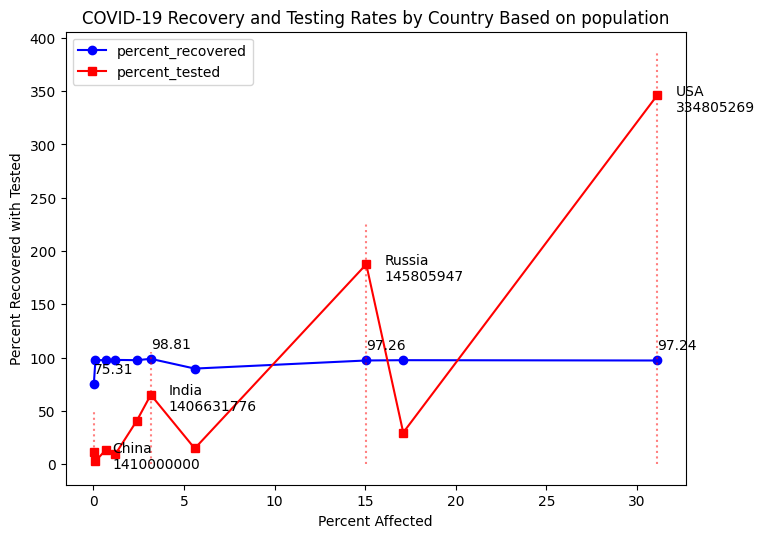

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# create a plot with custom parameters
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

# add the first scatter plot to the graph
df_sorted_2.plot('percent_affected', 'percent_recovered',  c='blue', marker='o', ax=ax)

# add the second scatter plot to the graph
df_sorted_2.plot('percent_affected', 'percent_tested', c='red', marker='s', ax=ax)

# add text labels and dotted line for each data point
for i, row in df_sorted_2.iterrows():
    if row['Country'] in ['Russia', 'USA','India','China']:
        ax.text(row['percent_affected'] , row['percent_recovered']+10 , f"{row['percent_recovered']:.2f}", fontsize=10)
        ax.text(row['percent_affected'] + 1, row['percent_tested'], row['Country'], fontsize=10)
        ax.text(row['percent_affected'] + 1, row['percent_tested']-15, row['Population'], fontsize=10)
        ax.vlines(row['percent_affected'], 0, row['percent_tested']+40, linestyle='dotted', alpha=0.5,color='red')

# set plot labels and title
ax.set_xlabel('Percent Affected')
ax.set_ylabel('Percent Recovered with Tested')
ax.set_title('COVID-19 Recovery and Testing Rates by Country Based on population')

# move the legend to the top left corner
ax.legend(loc='upper left')

# display the plot
plt.show()

## Conclusion: this is here concluded that the countries with percent_tested here are more than 100% for Russia and USA, with the recovery percent of 97.26 and 97.24% respectively and India and China though with the highest number of population failed testing all the people for covid